In [ ]:
!pip install pandas numpy seaborn faiss-cpu chromadb fastapi uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.7 MB/s eta 0:00:00

In [ ]:
import pandas as pd
data_pth="/content/hotel_bookings.csv"
df =pd.read_csv(data_pth)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [ ]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.fillna({
    'children': 0,
    'country': 'Unknown',
    'agent': 0,
    'company': 0
}, inplace=True)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

<ipython-input-8-a2c1b3672dbd>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [ ]:
df['hotel'].value_counts()

,count
hotel,
City Hotel,79330
Resort Hotel,40060


**ANALYTICS & REPORTING**

REVENUE TRENDS OVER TIME

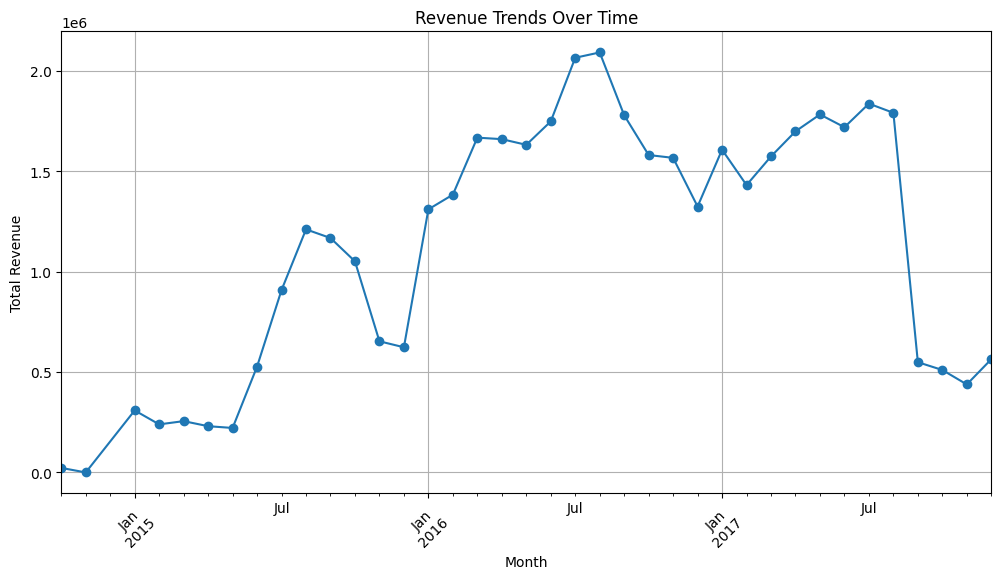

In [ ]:
import matplotlib.pyplot as plt
df['revenue']=df['adr']*(df['stays_in_week_nights']+df['stays_in_weekend_nights'])
df['month']=df['reservation_status_date'].dt.to_period("M")
monthly_revenue=df.groupby('month')['revenue'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker='o', linestyle='-')
plt.title('Revenue Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.show()

CANCELATION RATE as percentage of total bookings

In [ ]:
cancelation_rate=df['is_canceled'].mean()*100
print(f"Cancelation Rate: {cancelation_rate:.2f}%")

Cancelation Rate: 37.04%


Geographical distribution of users doing the bookings

In [ ]:
df['country'].value_counts()

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
MRT,1
KIR,1
SDN,1


In [ ]:
column_name = 'country'  # Replace with the actual column name
column_data = df[column_name]
unique_types = column_data.apply(type).unique()
num_unique_types = len(unique_types)
print(f"Number of unique data types in '{column_name}': {num_unique_types}")

Number of unique data types in 'country': 1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PRT'),
  Text(1, 0, 'GBR'),
  Text(2, 0, 'FRA'),
  Text(3, 0, 'ESP'),
  Text(4, 0, 'DEU'),
  Text(5, 0, 'ITA'),
  Text(6, 0, 'IRL'),
  Text(7, 0, 'BEL'),
  Text(8, 0, 'BRA'),
  Text(9, 0, 'NLD')])

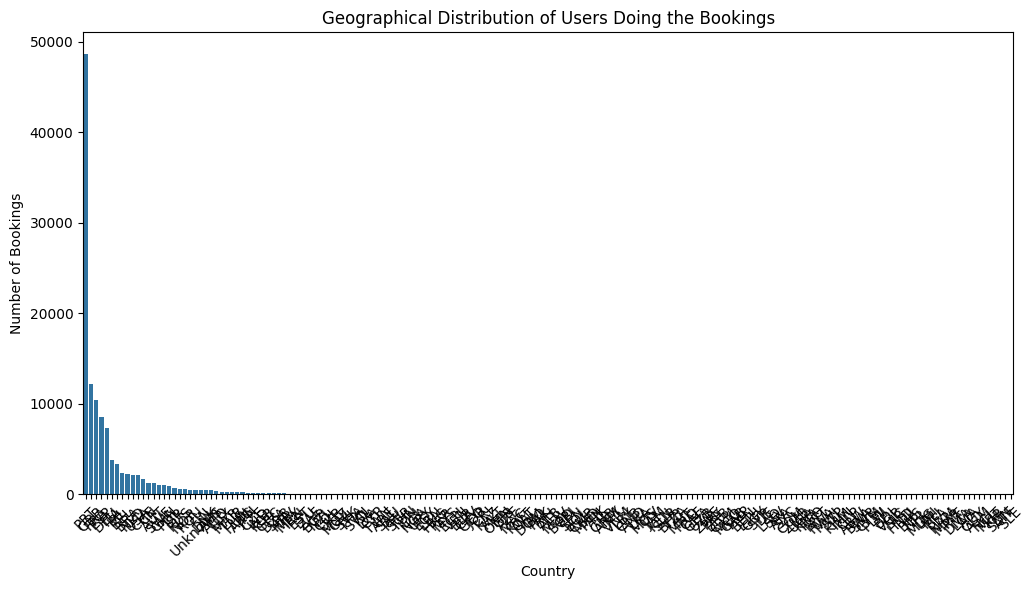

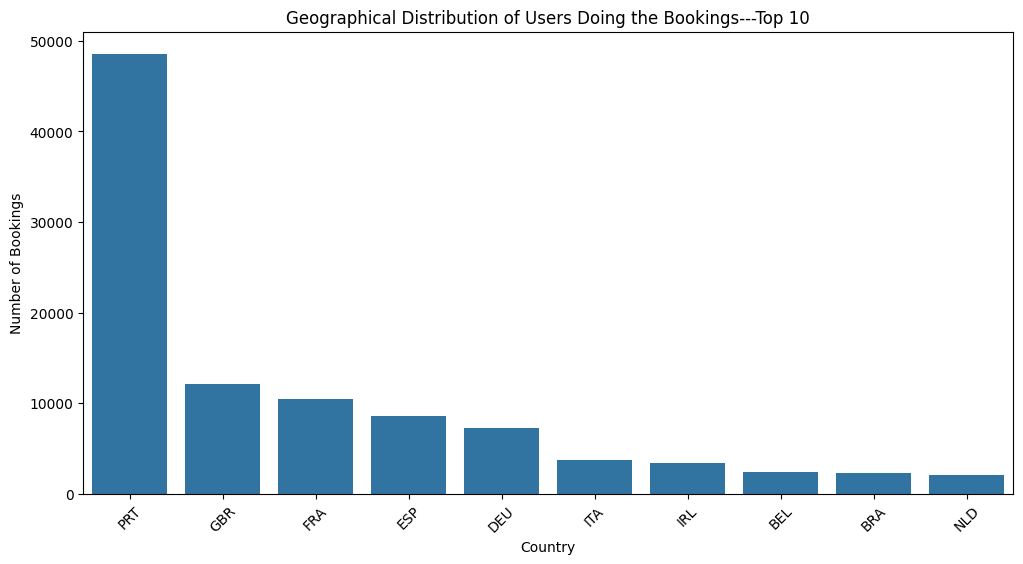

In [ ]:
import seaborn as sns
country_counts=df['country'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Geographical Distribution of Users Doing the Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

#top 10 countries
country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Geographical Distribution of Users Doing the Bookings---Top 10')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

Booking Lead time distribution

Text(0, 0.5, 'Frequency')

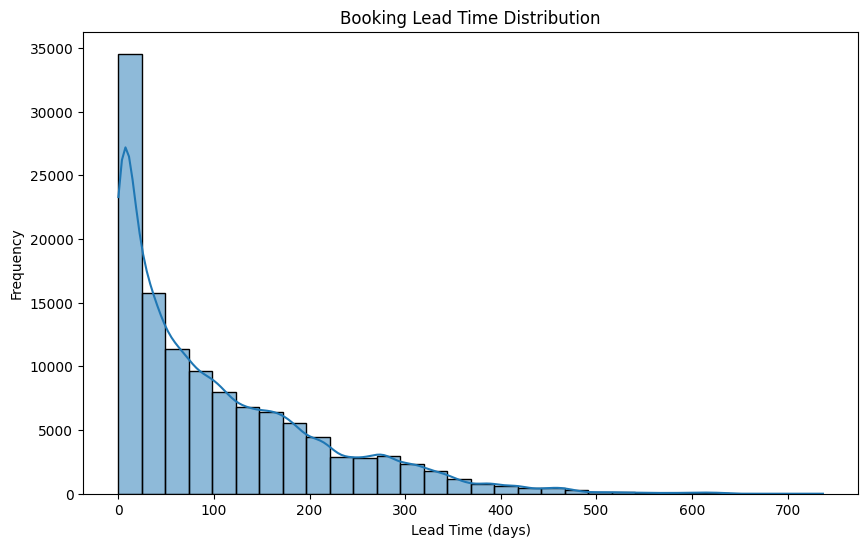

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Booking Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')

**RAG**

In [ ]:
!pip install chromadb sentence-transformers transformers

In [ ]:
!pip install transformers
from transformers import pipeline
llm = pipeline("text-generation", model="EleutherAI/gpt-neo-1.3B")

Device set to use cpu


In [ ]:
pip install transformers torch

In [8]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import chromadb
from datetime import datetime

# Load and initialize
chroma = chromadb.PersistentClient(path="/content/chroma_db1")
collection = chroma.get_or_create_collection(name="hotel_bookings")
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Function to format
def format_booking(row):
    return (
        f"Date: {row['reservation_status_date']} | "
        f"Hotel: {row['hotel']} | "
        f"Country: {row['country']} | "
        f"Week Nights: {row['stays_in_week_nights']} | "
        f"Weekend Nights: {row['stays_in_weekend_nights']} | "
        f"Rate: {row['adr']} | "
        f"Status: {'Canceled' if row['is_canceled'] else 'Confirmed'}"
    )

# Loop through and encode
for index, row in df.iterrows():
    doc_text = format_booking(row)

    # Extract date info
    date = pd.to_datetime(row['reservation_status_date'], errors='coerce')
    year = date.year if not pd.isnull(date) else None
    month = date.month if not pd.isnull(date) else None

    embedding = embedding_model.encode(doc_text).tolist()

    collection.add(
        ids=[str(index)],
        embeddings=[embedding],
        metadatas=[{
            "booking_info": doc_text,
            "year": year,
            "month": month,
            "country": row['country']
        }]
    )

Succesfully upadted vector database


In [34]:
from google.colab import files
import os
import shutil

output_zip_path = "/content/chroma_db1.zip"
shutil.make_archive("/content/chroma_db1", 'zip', "/content/chroma_db1")
files.download(output_zip_path)
print(f"Chroma database downloaded as {output_zip_path}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Chroma database downloaded as /content/chroma_db1.zip


In [32]:
def extract_structured_query(user_query):
    prompt = f"""
You are a helpful assistant that extracts structured filters and intent from user questions related to hotel bookings.

Return JSON like:
{{
  "intent": "...",
  "filters": {{
    "country": "...",
    "year": ...,
    "month": ...
  }}
}}

### Example:
User Query: "What was the total revenue in July 2017 in Portugal?"
Extracted Info:
{{
  "intent": "total_revenue",
  "filters": {{
    "country": "PRT",
    "year": 2017,
    "month": 7
  }}
}}

---

User Query: "{user_query}"
Extracted Info:
"""

    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
    output_ids = model.generate(input_ids, max_length=512, do_sample=False, temperature=0.3)
    response = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    # Extract the JSON part
    import re, json
    match = re.search(r"\{[\s\S]*?\}", response)
    if match:
        try:
            return json.loads(match.group())
        except json.JSONDecodeError:
            print(" Couldn't parse JSON. Response:", response)
            return None
    else:
        print(" No JSON found in response:", response)
        return None
def generate_response(question, embedding_model, collection):
    filters=extract_structured_query(question)
    print(filters)
    query_embedding = embedding_model.encode(question).tolist()
    results = collection.query(query_embeddings=[query_embedding], n_results=50,where=filters)
    retrieved_info = "\n".join([res["booking_info"] for res in results["metadatas"][0]])
    retrieved_info = retrieved_info[:1000]
    print("Retrieved Info:", retrieved_info)
    prompt = (
        f"You are a professional and helpful assistant, an expert in handling hotel booking data. "
        f"Use the following hotel booking data:\n\n{retrieved_info}\n\n"
        f"Analyze the question clearly and answer it in a concise way using the data provided and answer it in a single line:\n{question}\n\nAnswer:"
    )
    response = llm(prompt, max_length=300, do_sample=True, temperature=0.7, truncation=True)
    generated_text = response[0]['generated_text']
    answer_start = generated_text.find("Answer:")
    final_answer = generated_text[answer_start + len("Answer:"):].strip()
    print("Answer:", final_answer)
    return final_answer


In [7]:
# embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
# collection=chroma.get_or_create_collection(name="hotel_bookings")
query_list=['Show me total revenue for July 2017.','Which locations had the highest booking cancellations?','What is the average price of a hotel booking?']
for question in query_list:
    # print("Question:", question)
    generate_response(question,embedding_model,collection)

Question: Show me total revenue for July 2017.
Total revenue in July 2017: €3132959.07

 Which locations had the highest booking cancellations?.
Which locations had the highest booking cancellations? PRT: 27519

 What is the average price of a hotel booking?
What is the average price of a hotel booking? €101.83


**API**

In [ ]:
from flask import Flask, request, jsonify
from threading import Thread

app = Flask(__name__)

@app.route('/ask', methods=['POST'])
def handle_query():
    data = request.get_json()
    if not data or 'question' not in data:
        return jsonify({'error': 'Please provide a question'}), 400

    question = data['question']

    try:
        answer = generate_response(question, embedding_model, collection)
        return jsonify({'answer': answer})
    except Exception as e:
        print("Error:", str(e))
        return jsonify({'error': str(e)}), 500

@app.route("/analytics", methods=["POST"])
def analytics():
    try:
        # Extract all metadata from Chroma
        docs = collection.get(include=["metadatas"])
        metadata_list = docs["metadatas"]

        if not metadata_list:
            return jsonify({"message": "No data available in vector store."})

        # Convert to DataFrame
        df = pd.DataFrame(metadata_list)

        summary = {
            "total_documents": len(df),
            "unique_countries": df["country"].nunique(),
            "available_years": sorted(df["year"].dropna().unique().tolist()),
            "available_months": sorted(df["month"].dropna().unique().tolist()),
            "top_countries_by_count": df["country"].value_counts().head(5).to_dict(),
            "records_per_year": df["year"].value_counts().sort_index().to_dict(),
            "records_per_month": df["month"].value_counts().sort_index().to_dict()
        }

        return jsonify(summary)

    except Exception as e:
        import traceback
        traceback.print_exc()
        return jsonify({"error": str(e)}), 500

# Run Flask in a separate thread for Colab
def run_app():
    app.run(host='0.0.0.0', port=5000)

flask_thread = Thread(target=run_app)
flask_thread.start()